## 주성분분석
#### 분산이 가장 큰 방향을 나타내는 선을 찾고, 그 특성에 원래 데이터 샘플을 투영하는 방식의 주성분분석
#### 실제 데이터 차원보다 더 적게 주요 성분을 찾아가는 알고리즘

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
# 찾은 성분의 형태
print(pca.components_.shape)

(50, 10000)


In [4]:
# 그래프 그리기
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플의 개수
    # 한줄에 10개의 이미지를 그림
    rows = int(np.ceil(n/10))
    # rows가 1이면 열에 들어가는 이미지 개수는 샘플의 수, 2이상이면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그리도록 설정
                axs[i, j].imshow(arr[i*10], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

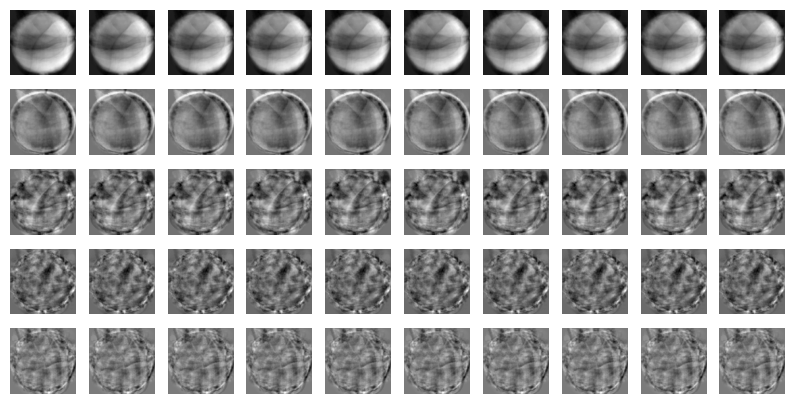

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
# 찾은 주성분을 투영(차원 축소)
fruits_pca = pca.transform(fruits_2d)

In [7]:
fruits_pca.shape

(300, 50)

## 원본데이터로 재구성

In [11]:
# 10000개의 특성을 50개로, 1/200인데 분류가 가능할까?
# 50개로 줄여진 차원데이터를 다시 invers_transform을 사용하여 100x100 이미지로 변환
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
# 재배열
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

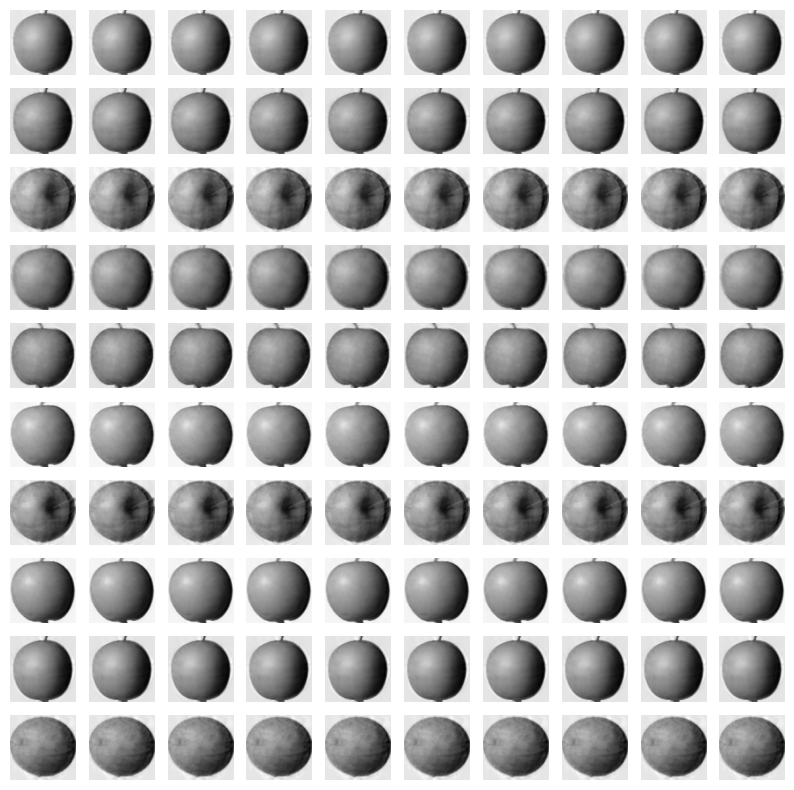

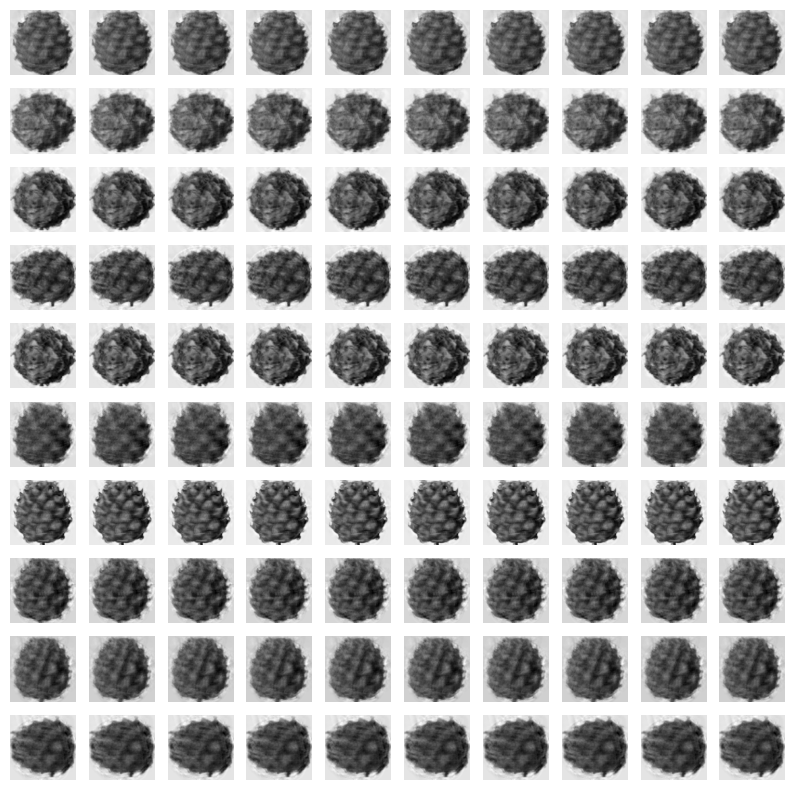

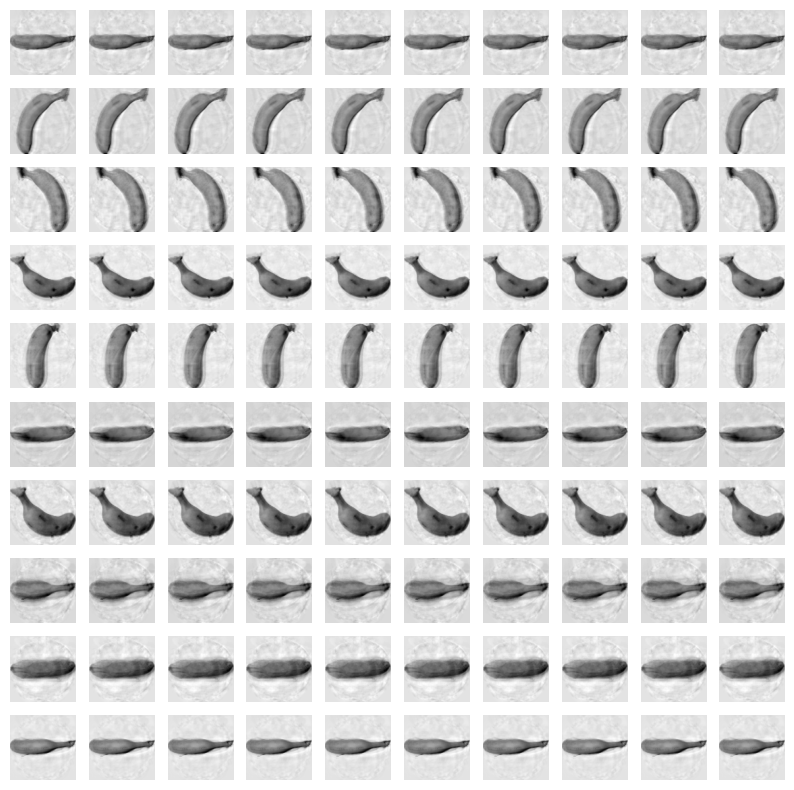

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

## 설명된 분산

#### 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 정략적으로 기록한 값

In [14]:
# 각 주성분의 분산 비율이 기록 = explained_variance_ratio
print(np.sum(pca.explained_variance_ratio_))

0.9215504703547511


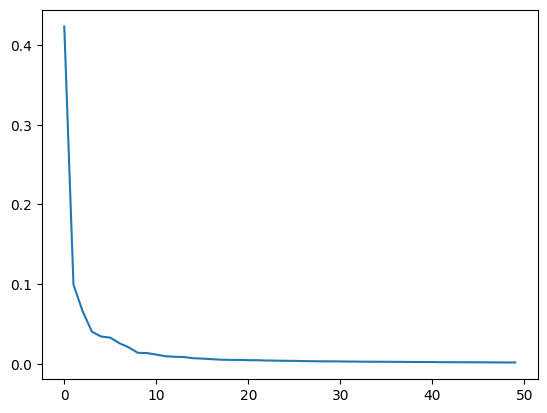

In [15]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 지도학습에서 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
# 지도학습이기 때문에 타깃값 설정
target = np.array([0]*100 + [1]*100 + [2]*100)

In [18]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# 원본데이터로 훈련-검증
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.43373613357543944


In [21]:
# PCA 적용하여 훈련-검증

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.008384609222412109


In [22]:
# n_components를 비율로 조정해서 사용
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [23]:
# 단 2개의 특성만으로 원본데이터 분산의 50%를 표현할 수 있음
print(pca.n_components_)

2


In [24]:
# pca transform
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [25]:
# PCA 적용하여 훈련-검증

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.010970640182495116


c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.